## Assinment 1
Sofia Gimholt and Amanda Björk

In [31]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import scipy.stats as scp
from scipy.stats import norm, t

import statsmodels.api as sm
import pylab as py

In [2]:
weatherdf = pd.read_csv("SMHI_Data.csv", sep=",")
weatherdf

,Datum,Tid (UTC),Lufttemperatur
0,2010-03-01,00:00:00,2.0
1,2010-03-01,01:00:00,NaN
2,2010-03-01,02:00:00,2.2
3,2010-03-01,03:00:00,1.7
4,2010-03-01,04:00:00,1.7
...,...,...,...
113976,2023-01-01,02:00:00,6.2
113977,2023-01-01,03:00:00,6.5
113978,2023-01-01,04:00:00,7.7
113979,2023-01-01,05:00:00,8.7


# Questions for E

#### Q1. Explain the data cleaning steps you consider for analyzing the provided dataset. You must motivate and describe why, how, and in which order you are going to apply the selected steps to the dataset.    
Then search for the missing values and use the Imputation by interpolation method to predict the missing values. Missing values can lead to incorrect or misleading results while preforming a data analysis. The method imputation by interpolation works by using linger regression to predict the missing values. This is a method that works well when only one column is missing from each data point. This method can cause some issuse with outliers but that can be monitered. 

Check for duplicates, and delett the duplicated data. To ensure that the data is clean and valid the data can not have any duplicates. Duplicate entries can lead to an incorrect data analysis. If there are two rows with the same date and time it can cause confusion and weigh the data.    

Then search for outliers. Outliers may be the cause of a mesuring error or another error in the data collection. Different types of regression may be affected by the outliers. There is not much to do to "clean" the data from outlier but they need to be taken into consideration when analysing the dataset.     

Check consistensy. Looking at the dataset it does lack consistancy in some places. Some days data is recorded every hour while other days only a few hours were recorded. This means that the dataset does not have consistancy.    

#### Q2. Does the dataset contain any missing values? If so, how many in both absolute terms and percentages? Reflect on the number of missing values. Do you regard it as much, or not?   

In [3]:
missingweather = weatherdf.isna()
missingweather

,Datum,Tid (UTC),Lufttemperatur
0,False,False,False
1,False,False,True
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
113976,False,False,False
113977,False,False,False
113978,False,False,False
113979,False,False,False


In [4]:
missingweather[missingweather['Lufttemperatur']==True]

,Datum,Tid (UTC),Lufttemperatur
1,False,False,True
10,False,False,True
41,False,False,True
47,False,False,True
49,False,False,True
...,...,...,...
113910,False,False,True
113911,False,False,True
113928,False,False,True
113953,False,False,True


In [5]:
6713/113981

0.058895780875759994

Yes the dataset has missing values, presisly 6713 datapoints. In prosentege is is 6% of the dataset. By analysing the number 6713 it may look intemidating and may feel like a large amount, but really it is not that large if when looking at the percentages of missing values it is not that intemidating and will not be regarded as much.

There is also a different type of missing value in the dataset. 
As discussed before the dataset is not consistant which means there are missing data for some timeslots. Some days every 24 hours have been recorded, when other days there are only one recorded tempeture. There is not alot to do about this but it should be taken into considuration when analysing the dataset.

In [6]:
weatherdf['Datumtid'] = pd.to_datetime(weatherdf['Datum'] + ' ' + weatherdf['Tid (UTC)'])

# Sort the DataFrame by date
weatherdf = weatherdf.sort_values(by='Datumtid')
weatherdf['Lufttemperatur'].replace(' ', np.nan, inplace=True)

# Interpolate missing values using linear interpolation
weatherdf['Lufttemperatur'] = pd.to_numeric(weatherdf['Lufttemperatur'])
weatherdf['Lufttemperatur'].interpolate(method='linear', inplace=True)

# Save the imputed data to a new csv file
weatherdf.to_csv('imputedDataset.csv', index=False)

#### Q3. Which strategy was used for handling the missing values? Motivate why you consider the selected strategy the most suitable for this task.     
Imputation by interpolation uses existing datapoints to try to predict missing datapoints. This can make it more accurate than other methods for handling missing datapoints. When dealing with tempature data it is good to know that tempature is often continuous meaning it can be shown over time. This makes it possible to eaisier predict a missing value based on the previous and next data point as the missing values should be somewhere in between.

As diskussed in previously the imputation by interpolation method was described to be used. The other methods that were considerd was the mean value imputation. This method will add valus without changing the mean value, this can contribute to some randome from data point to data point. The next method considerd was ranodm value imputation, this method just adds random valus which can cause statistical wrongs in the data set. The last method considerd was imputation by nearest neighbor. This by identifying the complete record which matches most to the surcumstanses around the missing values. This is more accurate than the mean method but requiers distance funktion.

#### Q4. Calculate the following statistics for the air temperature values in the dataset:
##### • minimum value

In [7]:
weatherMaxdf = weatherdf.sort_values(by='Lufttemperatur', ascending=True)
weatherMaxdf.head()

,Datum,Tid (UTC),Lufttemperatur,Datumtid
17017,2012-02-04,03:00:00,-19.2,2012-02-04 03:00:00
17018,2012-02-04,04:00:00,-19.0,2012-02-04 04:00:00
7032,2010-12-21,20:00:00,-18.9,2010-12-21 20:00:00
8582,2011-02-23,05:00:00,-18.6,2011-02-23 05:00:00
7043,2010-12-22,07:00:00,-18.3,2010-12-22 07:00:00


##### • maximum value   

In [8]:
weatherMaxdf = weatherdf.sort_values(by='Lufttemperatur', ascending=False)
weatherMaxdf.head()

,Datum,Tid (UTC),Lufttemperatur,Datumtid
74345,2018-07-16,11:00:00,39.6,2018-07-16 11:00:00
39164,2014-07-30,12:00:00,39.4,2014-07-30 12:00:00
56103,2016-06-25,12:00:00,39.0,2016-06-25 12:00:00
74368,2018-07-17,10:00:00,38.6,2018-07-17 10:00:00
74739,2018-08-01,15:00:00,38.2,2018-08-01 15:00:00


##### • sample mean   

In [9]:
data = weatherdf['Lufttemperatur']
mean = np.mean(data)
mean

9.431193795457359

##### • Q1/Q2/Q3 quartiles   

In [10]:
weatherdf.Lufttemperatur.quantile([0.25,0.5,0.75])

0.25     4.1
0.50     9.1
0.75    15.2
Name: Lufttemperatur, dtype: float64

##### • sample standard deviation   

In [11]:
std = np.std(data)
std

6.996340116814043

##### • 95% confidence interval of the mean

In [12]:
weatherTempdf = weatherdf['Lufttemperatur']

n = len(weatherTempdf)

stdError = weatherTempdf.std() / (n**0.5)

t.interval(0.95, n - 1, loc=mean, scale=stdError)

(9.390576660081946, 9.471810930832772)

#### Q5. Plot all available air temperature data as a line plot with dates on the x-axis.

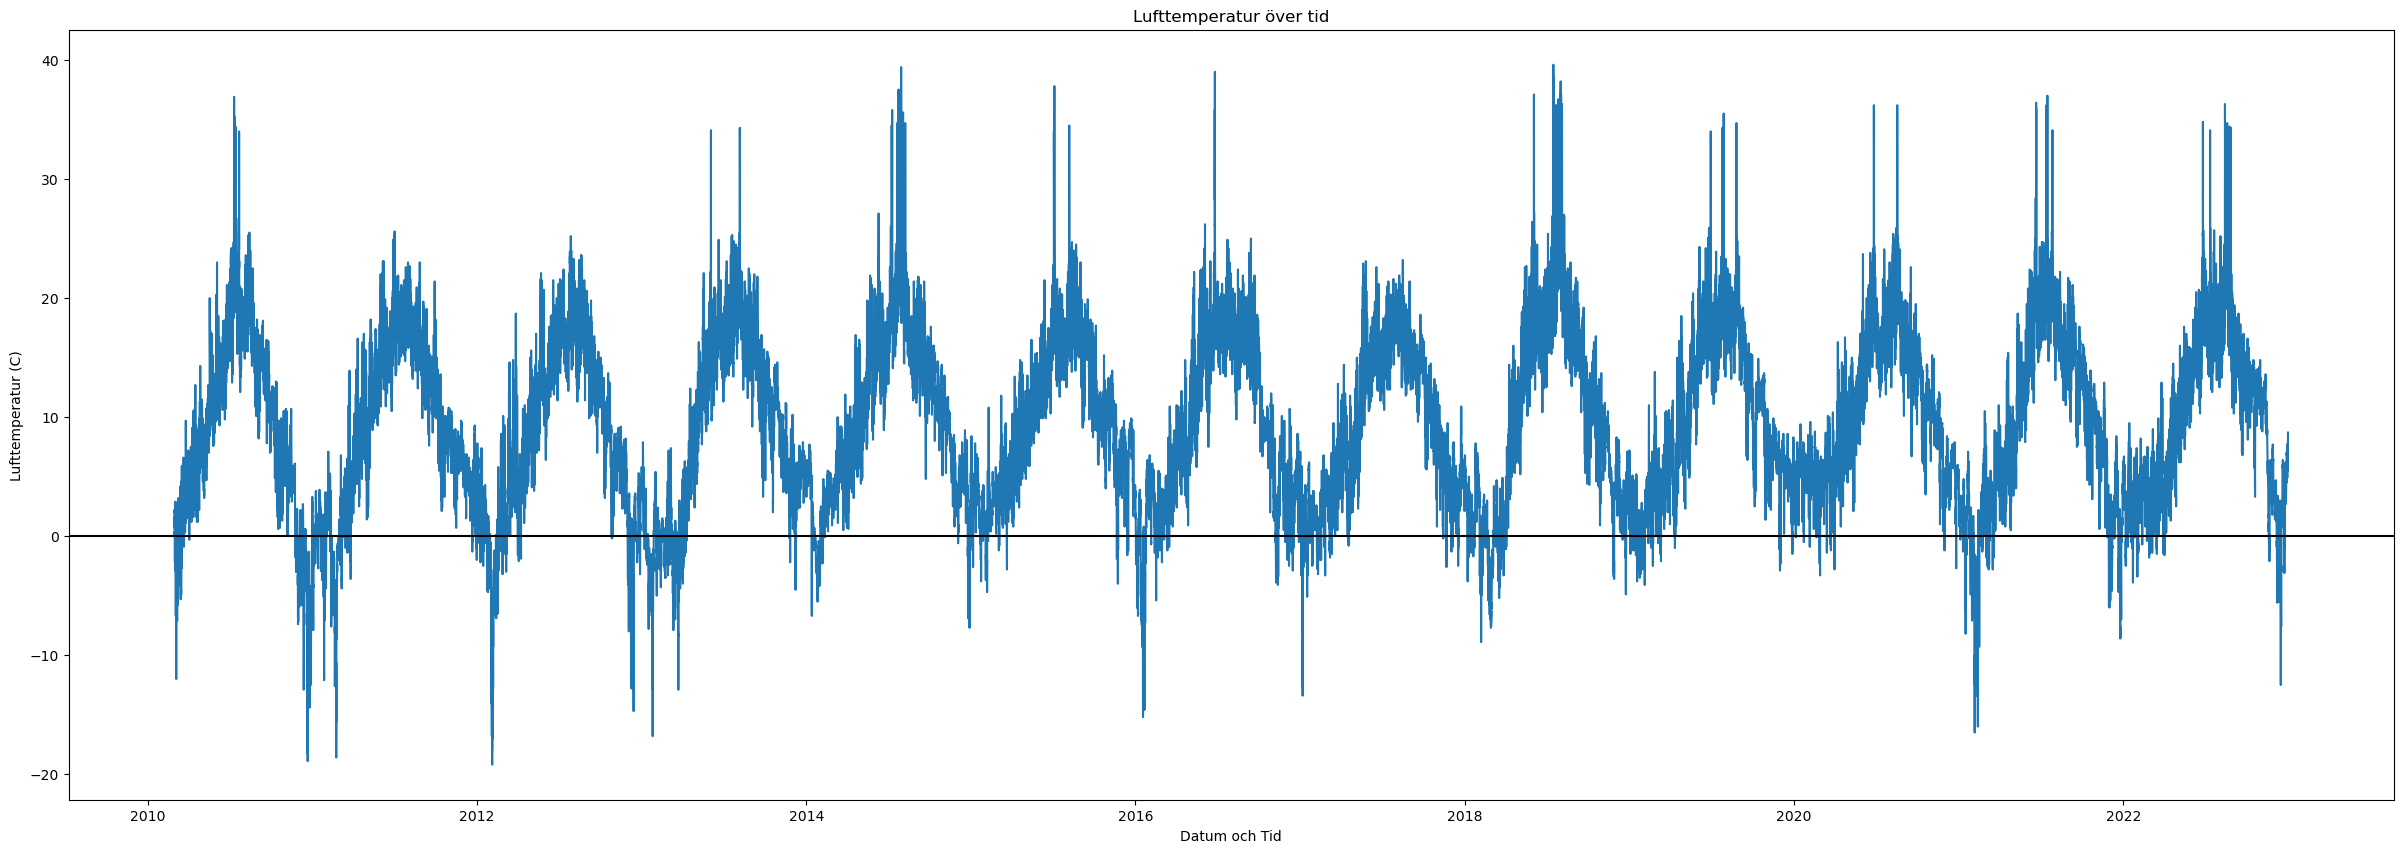

In [13]:
weatherdf['Datumtid'] = pd.to_datetime(weatherdf['Datum'] + ' ' + weatherdf['Tid (UTC)'])

plt.figure(figsize=(30,10))

plt.plot(weatherdf['Datumtid'], weatherdf['Lufttemperatur'])

plt.axhline(y=0, color='black', linestyle='-')

plt.xlabel('Datum och Tid')
plt.ylabel('Lufttemperatur (C)')
plt.title('Lufttemperatur över tid')

plt.show()

#### Q6. Rank the overall temperature per month, sort from the coldest to the warmest. List the top ten (10) coldest months in the dataset. Format the output as: YEAR/Month: temp, e.g.“2010/January: -5.0”

In [14]:
weatherdf['År'] = weatherdf['Datumtid'].dt.year
weatherdf['Månad'] = weatherdf['Datumtid'].dt.month_name()

# Average temperature per month
monthlyTemperatures = weatherdf.groupby(['År', 'Månad'])['Lufttemperatur'].mean().reset_index()

# Sort average temperature values in ascending order
coldestMonths = monthlyTemperatures.sort_values(by='Lufttemperatur').head(10)

# Top ten coldest months
for i, row in coldestMonths.iterrows():
    print(f"{row['År']}/{row['Månad']}: {row['Lufttemperatur']:.1f}")

2010/December: -3.8
2011/February: -1.5
2012/February: -1.5
2021/February: -1.0
2016/January: -0.9
2018/February: -0.9
2013/March: -0.8
2013/January: -0.6
2012/December: -0.6
2011/January: -0.4


### Drop duplicates

In [15]:
#Check for duplicates
weatherdf.duplicated(subset=['Datumtid'], keep='first').sum()

2093

In [21]:
#Drop Duplicates
weatherdf.drop_duplicates(inplace=True)

In [22]:
weatherdf

,Datum,Tid (UTC),Lufttemperatur,Datumtid,År,Månad
0,2010-03-01,00:00:00,2.0,2010-03-01 00:00:00,2010,March
1,2010-03-01,01:00:00,2.1,2010-03-01 01:00:00,2010,March
2,2010-03-01,02:00:00,2.2,2010-03-01 02:00:00,2010,March
3,2010-03-01,03:00:00,1.7,2010-03-01 03:00:00,2010,March
4,2010-03-01,04:00:00,1.7,2010-03-01 04:00:00,2010,March
...,...,...,...,...,...,...
113976,2023-01-01,02:00:00,6.2,2023-01-01 02:00:00,2023,January
113977,2023-01-01,03:00:00,6.5,2023-01-01 03:00:00,2023,January
113978,2023-01-01,04:00:00,7.7,2023-01-01 04:00:00,2023,January
113979,2023-01-01,05:00:00,8.7,2023-01-01 05:00:00,2023,January
